## Análise Exploratória de Dados - Marketing

## 1. Introdução
Esta análise tem como objetivo compreender o perfil dos clientes, seus hábitos de compra e como variáveis como escolaridade e estado civil influenciam seus gastos. Para isso, foram realizadas estatísticas descritivas e visualizações que nos ajudam a identificar padrões nos dados.


### Hipóteses a serem testadas:
- Pessoas solteiras compram mais
- Quanto maior a escolaridade, maior o consumo
- As pessoas gastam mais online
- Catálogos tem menor número de compras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dados_marketing.csv', sep=";")

In [3]:
print("Estrutura: ", df.shape)
print("Colunas: ", df.columns)

Estrutura:  (2000, 27)
Colunas:  Index(['ID', 'Ano Nascimento', 'Escolaridade', 'Estado Civil', 'Salario Anual',
       'Filhos em Casa', 'Adolescentes em Casa', 'Data Cadastro',
       'Dias Desde Ultima Compra', 'Gasto com Eletronicos',
       'Gasto com Brinquedos', 'Gasto com Moveis', 'Gasto com Utilidades',
       'Gasto com Alimentos', 'Gasto com Vestuario',
       'Numero de Compras com Desconto', 'Numero de Compras na Web',
       'Numero de Compras via Catalogo', 'Numero de Compras na Loja',
       'Numero Visitas WebSite Mes', 'Compra na Campanha 1',
       'Compra na Campanha 2', 'Compra na Campanha 3', 'Compra na Campanha 4',
       'Compra na Campanha 5', 'Comprou', 'Pais'],
      dtype='object')


In [4]:
df.head()

,ID,Ano Nascimento,Escolaridade,Estado Civil,Salario Anual,Filhos em Casa,Adolescentes em Casa,Data Cadastro,Dias Desde Ultima Compra,Gasto com Eletronicos,...,Numero de Compras via Catalogo,Numero de Compras na Loja,Numero Visitas WebSite Mes,Compra na Campanha 1,Compra na Campanha 2,Compra na Campanha 3,Compra na Campanha 4,Compra na Campanha 5,Comprou,Pais
0,2795,1958,Mestrado,Solteiro,30523.0,2,1,07/01/2020,0,5,...,0,2,7,0,0,0,0,0,0,Chile
1,2285,1954,Mestrado,Casado,36634.0,0,1,05/12/2023,0,213,...,2,5,7,0,0,0,0,0,0,Espanha
2,115,1966,Mestrado,Solteiro,43456.0,0,1,03/02/2023,0,275,...,1,8,5,0,0,0,0,0,0,Argentina
3,10470,1979,Mestrado,Solteiro,40662.0,1,0,03/05/2023,0,40,...,1,3,4,0,0,0,0,0,0,Alemanha
4,4065,1976,Doutorado,Solteiro,49544.0,1,0,02/11/2020,0,308,...,1,8,7,0,0,0,0,0,0,Estados Unidos


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2000 non-null   int64  
 1   Ano Nascimento                  2000 non-null   int64  
 2   Escolaridade                    2000 non-null   object 
 3   Estado Civil                    2000 non-null   object 
 4   Salario Anual                   1981 non-null   float64
 5   Filhos em Casa                  2000 non-null   int64  
 6   Adolescentes em Casa            2000 non-null   int64  
 7   Data Cadastro                   2000 non-null   object 
 8   Dias Desde Ultima Compra        2000 non-null   int64  
 9   Gasto com Eletronicos           2000 non-null   int64  
 10  Gasto com Brinquedos            2000 non-null   int64  
 11  Gasto com Moveis                2000 non-null   int64  
 12  Gasto com Utilidades            20

In [6]:
# limpeza e pre-processamneto de dados
df = df.dropna()
print(df.shape)

(1981, 27)


In [7]:
df.columns = df.columns.str.replace(" ", "_")
print(df.columns)

Index(['ID', 'Ano_Nascimento', 'Escolaridade', 'Estado_Civil', 'Salario_Anual',
       'Filhos_em_Casa', 'Adolescentes_em_Casa', 'Data_Cadastro',
       'Dias_Desde_Ultima_Compra', 'Gasto_com_Eletronicos',
       'Gasto_com_Brinquedos', 'Gasto_com_Moveis', 'Gasto_com_Utilidades',
       'Gasto_com_Alimentos', 'Gasto_com_Vestuario',
       'Numero_de_Compras_com_Desconto', 'Numero_de_Compras_na_Web',
       'Numero_de_Compras_via_Catalogo', 'Numero_de_Compras_na_Loja',
       'Numero_Visitas_WebSite_Mes', 'Compra_na_Campanha_1',
       'Compra_na_Campanha_2', 'Compra_na_Campanha_3', 'Compra_na_Campanha_4',
       'Compra_na_Campanha_5', 'Comprou', 'Pais'],
      dtype='object')


In [8]:
df['Data_Cadastro'] = pd.to_datetime(df['Data_Cadastro'])
tipo = df['Data_Cadastro'].dtype
print(tipo)

datetime64[ns]


## Visão: Clientes

In [9]:
total_clientes = df['ID'].count()
print("Total de clientes: ", total_clientes)

media_sal_anual = df['Salario_Anual'].mean()
print(f"Media Salário Anual: {media_sal_anual:.2f}")

num_compras_site = df['Numero_de_Compras_na_Web'].sum()
print("Compras pelo site: ", num_compras_site)

num_compras_catalogo = df['Numero_de_Compras_via_Catalogo'].sum()
print("Compras via catálogo: ", num_compras_catalogo )

num_compras_loja = df['Numero_de_Compras_na_Loja'].sum()
print("Compras na Loja: ", num_compras_loja )

num_compras_desconto = df['Numero_de_Compras_com_Desconto'].sum()
print("Compras com Desconto: ", num_compras_desconto)

Total de clientes:  1981
Media Salário Anual: 52290.85
Compras pelo site:  8068
Compras via catálogo:  5234
Compras na Loja:  11499
Compras com Desconto:  4614


In [10]:
# Taxa de conversão - site
num_visitas_site = df['Numero_Visitas_WebSite_Mes'].sum()
print("Total de visitas ao site (Tráfego): ", num_visitas_site)

taxa_conversao = (num_compras_site / num_visitas_site) * 100
print(f"Taxa de conversão do site: {taxa_conversao:.2f}%")

Total de visitas ao site (Tráfego):  10557
Taxa de conversão do site: 76.42%


In [11]:
# Total de clientes por Escolaridade
clientes_por_escolaridade = df['Escolaridade'].value_counts()
print(clientes_por_escolaridade)

Curso Superior    992
Doutorado         432
Mestrado          332
Segundo Grau      176
Primeiro Grau      49
Name: Escolaridade, dtype: int64


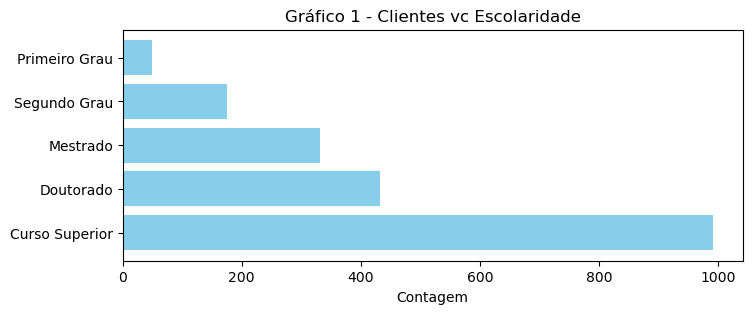

In [12]:
labels1 = clientes_por_escolaridade.index
values1 = clientes_por_escolaridade.values

plt.figure(figsize=(8, 3))
plt.barh(labels1, values1, color='skyblue')
plt.xlabel("Contagem")
plt.title("Gráfico 1 - Clientes vc Escolaridade")
plt.show()

In [13]:
# Total de clientes por Estado Civil
clientes_por_estado_civil = df['Estado_Civil'].value_counts()
print(clientes_por_estado_civil)

Solteiro      1185
Casado         517
Divorciado     279
Name: Estado_Civil, dtype: int64


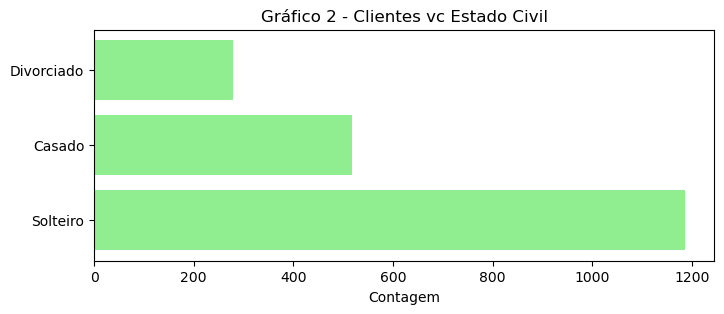

In [14]:
labels2 = clientes_por_estado_civil.index
values2 = clientes_por_estado_civil.values

plt.figure(figsize=(8, 3))
plt.barh(labels2, values2, color='lightgreen')
plt.xlabel("Contagem")
plt.title("Gráfico 2 - Clientes vc Estado Civil")
plt.show()

## Visão: Comportamento de Compra

In [15]:
df['Total_Gasto'] = (df['Gasto_com_Alimentos'] + df['Gasto_com_Brinquedos'] + 
                    df['Gasto_com_Eletronicos'] + df['Gasto_com_Moveis'] + 
                    df['Gasto_com_Utilidades'] + df['Gasto_com_Vestuario'])
print(df['Total_Gasto'])

0        13
1       335
2       393
3        92
4       404
       ... 
1995    661
1996     53
1997    859
1998    849
1999     26
Name: Total_Gasto, Length: 1981, dtype: int64


In [16]:
total_por_categoria = df[['Gasto_com_Alimentos', 'Gasto_com_Brinquedos', 
                          'Gasto_com_Eletronicos', 'Gasto_com_Moveis', 
                          'Gasto_com_Utilidades', 'Gasto_com_Vestuario']].sum()

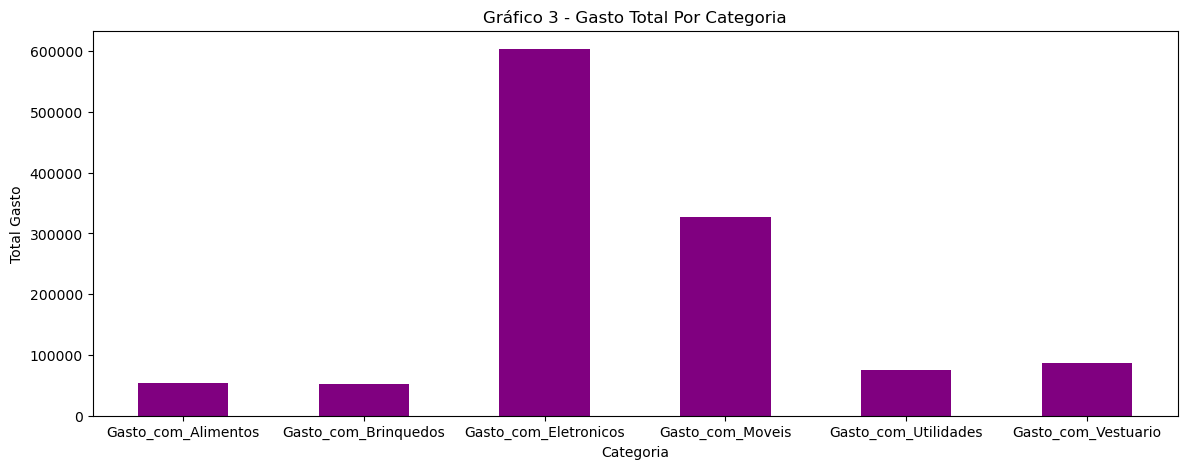

In [17]:
plt.figure(figsize=(14, 5))
total_por_categoria.plot(kind="bar", color='purple')
plt.title("Gráfico 3 - Gasto Total Por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Total Gasto")
plt.xticks(rotation=0)
plt.show()

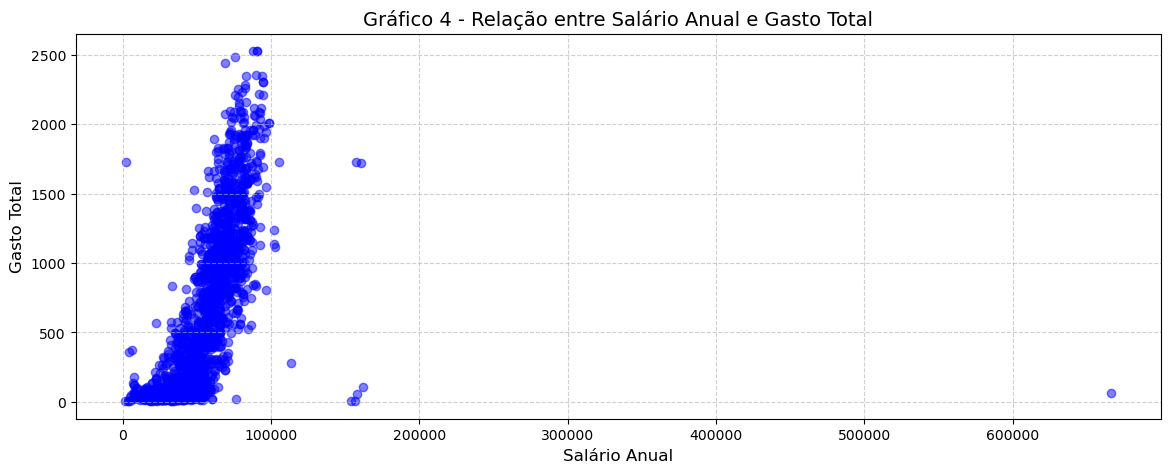

In [18]:
plt.figure(figsize=(14,5))
plt.scatter(df['Salario_Anual'], df['Total_Gasto'], color='blue', alpha=0.5)

# Personalização do gráfico
plt.title('Gráfico 4 - Relação entre Salário Anual e Gasto Total', fontsize=14)
plt.xlabel('Salário Anual', fontsize=12)
plt.ylabel('Gasto Total', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

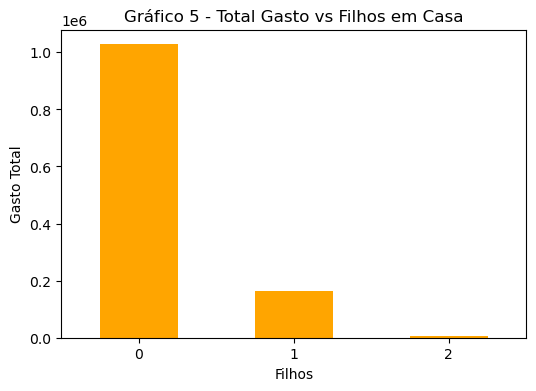

In [19]:
# Total de Gastos vs Filhos em casa 
gasto_filhos_casa = df.groupby('Filhos_em_Casa')['Total_Gasto'].sum()

plt.figure(figsize=(6, 4))
gasto_filhos_casa.plot(kind="bar", color='orange')
plt.title("Gráfico 5 - Total Gasto vs Filhos em Casa")
plt.xlabel("Filhos")
plt.ylabel("Gasto Total")
plt.xticks(rotation=0)
plt.show()

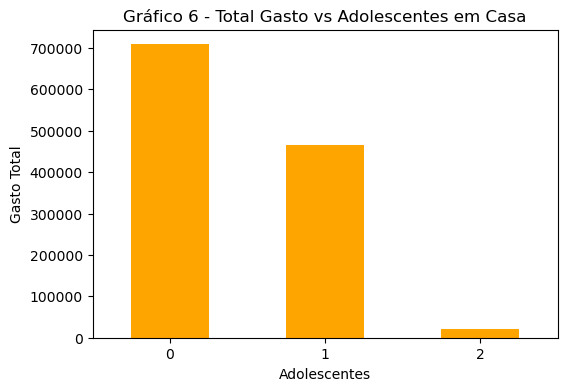

In [20]:
# Total de Gastos vs Adolescentes em casa
gasto_adolescente_casa = df.groupby('Adolescentes_em_Casa')['Total_Gasto'].sum()

plt.figure(figsize=(6, 4))
gasto_adolescente_casa.plot(kind="bar", color='orange')
plt.title("Gráfico 6 - Total Gasto vs Adolescentes em Casa")
plt.xlabel("Adolescentes")
plt.ylabel("Gasto Total")
plt.xticks(rotation=0)
plt.show()

Escolaridade
Curso Superior    614088
Doutorado         282965
Mestrado          203863
Primeiro Grau       3006
Segundo Grau       92239
Name: Total_Gasto, dtype: int64


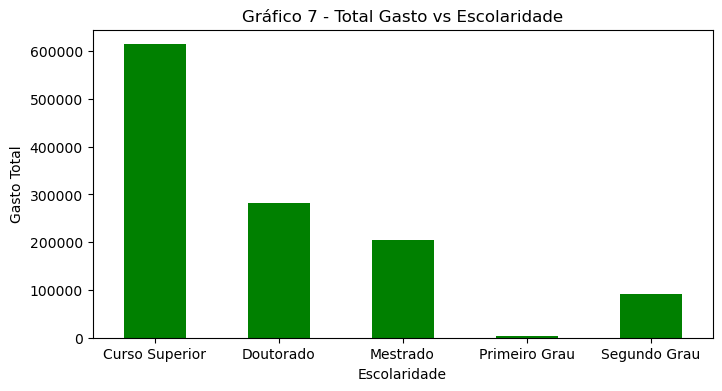

In [21]:
gasto_por_escolaridade = df.groupby('Escolaridade')['Total_Gasto'].sum()
print(gasto_por_escolaridade)

plt.figure(figsize=(8, 4))
gasto_por_escolaridade.plot(kind="bar", color='green')
plt.title("Gráfico 7 - Total Gasto vs Escolaridade")
plt.xlabel("Escolaridade")
plt.ylabel("Gasto Total")
plt.xticks(rotation=0)
plt.show()

Estado_Civil
Casado        316852
Divorciado    176623
Solteiro      702686
Name: Total_Gasto, dtype: int64


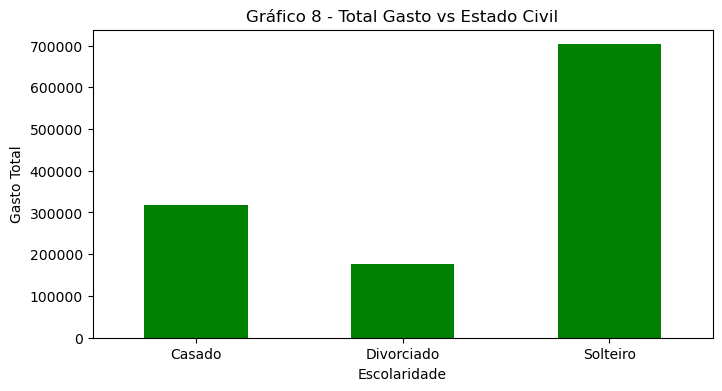

In [22]:
gasto_por_estado_civil = df.groupby('Estado_Civil')['Total_Gasto'].sum()
print(gasto_por_estado_civil)

plt.figure(figsize=(8, 4))
gasto_por_estado_civil.plot(kind="bar", color='green')
plt.title("Gráfico 8 - Total Gasto vs Estado Civil")
plt.xlabel("Escolaridade")
plt.ylabel("Gasto Total")
plt.xticks(rotation=0)
plt.show()

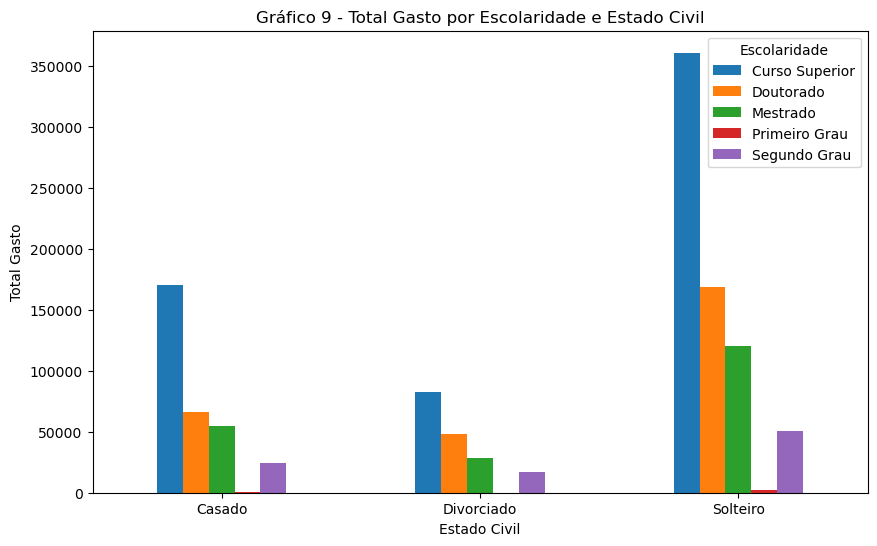

In [23]:
# Total gasto por Escolaridade e Estado civil
compras_Escolaridade_estadoCivil = df.groupby(['Estado_Civil', 'Escolaridade'])['Total_Gasto'].sum()

# Convertendo para DataFrame usando .unstack()
pivot_escolaridade = compras_Escolaridade_estadoCivil.unstack()

pivot_escolaridade.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Estado Civil")
plt.ylabel("Total Gasto")
plt.title("Gráfico 9 - Total Gasto por Escolaridade e Estado Civil")
plt.xticks(rotation=0)
plt.legend(title="Escolaridade")

plt.show()

## Visão: Campanhas

Comprou
0    1662
1     319
Name: ID, dtype: int64


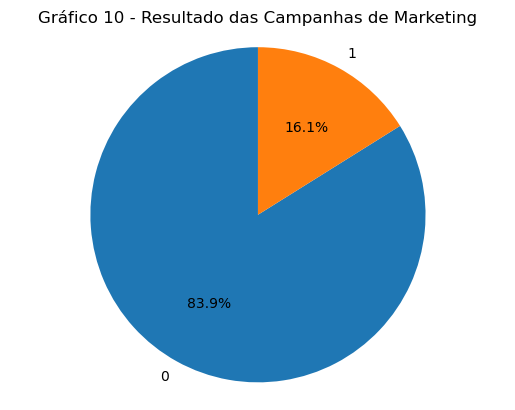

In [24]:
# Quantos clientes compraram em alguma campanha?
comprou_na_campanha = df.groupby('Comprou')['ID'].count()
print(comprou_na_campanha)

labelsPie1 = comprou_na_campanha.index
sizesPie1 = comprou_na_campanha.values

fig1, ax1 = plt.subplots()
ax1.pie(sizesPie1 , labels=labelsPie1, autopct='%1.1f%%', startangle=90)
plt.title("Gráfico 10 - Resultado das Campanhas de Marketing")
ax1.axis('equal')
plt.show()

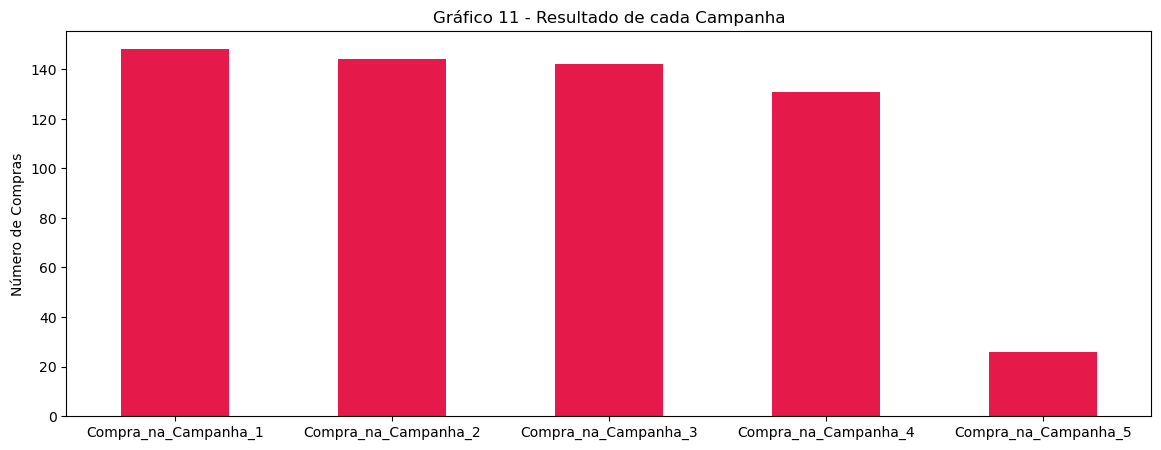

In [25]:
# resultado campanhas - total de compras 
total_campanhas = df[['Compra_na_Campanha_1', 'Compra_na_Campanha_2', 
                          'Compra_na_Campanha_3', 'Compra_na_Campanha_4', 
                          'Compra_na_Campanha_5']].sum()
plt.figure(figsize=(14, 5))
total_campanhas.plot(kind="bar", color='#e6194B')
plt.title("Gráfico 11 - Resultado de cada Campanha")
plt.xlabel("")
plt.ylabel("Número de Compras")
plt.xticks(rotation=0)
plt.show()

Comprou
Não    50909.116125
Sim    59489.742947
Name: Salario_Anual, dtype: float64


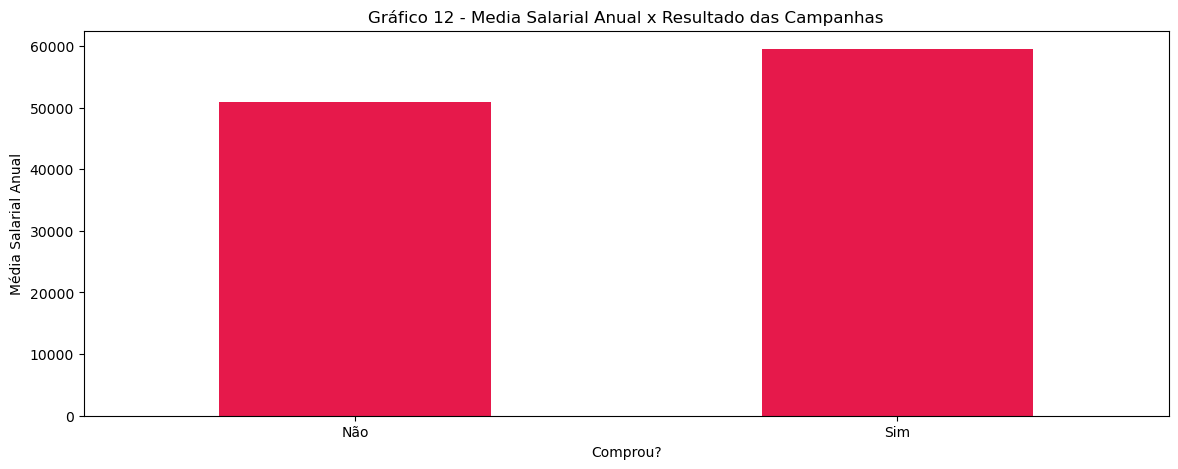

In [26]:
# media de salario anual x resultado da campanha
df['Comprou'] = df['Comprou'].map({0: 'Não', 1: 'Sim'})
media_salario_campanhas = df.groupby('Comprou')['Salario_Anual'].mean()
print(media_salario_campanhas)

plt.figure(figsize=(14, 5))
media_salario_campanhas.plot(kind="bar", color='#e6194B')
plt.title("Gráfico 12 - Media Salarial Anual x Resultado das Campanhas")
plt.xlabel("Comprou?")
plt.ylabel("Média Salarial Anual")
plt.xticks(rotation=0)
plt.show()

# Interpretação da Análise Exploratória de Dados (EDA) do Dataset de Marketing


## 1. Estatísticas Gerais
- Total de clientes:  1981
- Media Salário Anual: 52290.85
- O volume de compras está dividido da seguinte forma:
  - **Compras pelo site:** 8068.
  - **Compras via catálogo:** 5234.
  - **Compras na loja:** 11499.
- O total de visitas ao site (Tráfego) foi de  10557.
- A taxa de conversão das visitas ao site em compras foi de aproximadamente 76.42%.
- Compras com Desconto:  4614

---

## 2. Análise de Perfil dos Clientes

### 4.1 Distribuição por Escolaridade
O dataset inclui clientes com diferentes níveis de escolaridade. O **gráfico 7** mostra que clientes que possuem **Curso Superior** gastam mais, enquanto clientes que possuem apenas o **Primeiro Grau** representam uma menor parcela de consumo.
 
---
 
### 4.2 Distribuição por Estado Civil
Os clientes são segmentados em diferentes estados civis. O **gráfico 8** evidencia que **solteiros** gastam um total maior e **divorciados** um total menor.

---

### 4.3 Distribuição combinando Escolaridade e Estado Civil
O **gráfico 9** mostra a relação de gastos combinado o nível de Escolaridade e o Estado Civil. **Solteiros com curso superior** são os que mais gastam, enquanto **divorciados com apenas o primeiro grau** são os que menos consomem.

---

### 4.4 Relação entre filhos e gastos
Os **graficos 5 e 6** mostram que, quanto mais filhos em casa, mais controlados serão os gastos.


## 5. Gasto Total por Categoria

Foi criada a coluna `Total_Gasto`, que representa a soma dos gastos com:
- Alimentos
- Brinquedos
- Eletrônicos
- Móveis
- Utilidades
- Vestuário

O **gráfico 3** indica que a categoria com maior gasto é **Eletrônicos**, enquanto a de menor gasto é **Brinquedos**.

---

## 6. Relação Entre Salário e Gasto Total

Foi gerado um **gráfico de dispersão (gráfico 4)** para analisar a relação entre `Salario_Anual` e `Total_Gasto`. Os principais insights são:
- Clientes com salários mais altos tendem a gastar mais.
- Há outliers, ou seja, clientes que gastam muito independentemente do salário.

---

## 7. Conclusões

A análise revelou informações importantes sobre o comportamento dos clientes, incluindo:
- As categorias com maior e menor gasto.
- A influência da escolaridade, estado civil e tamanho da família nos padrões de compra.
- A relação entre renda e gastos.

Esses insights podem ser usados para otimizar campanhas de marketing e personalizar ofertas de acordo com o perfil de cada cliente. Por exemplo, com o dados que mostram onde os clientes mais gostam de comprar (loja física, online ou catalogo), apontam onde pode-se mudar a estratégia de marketing ou até mesmo onde focar para aumentar os resultados. Os dados que informam o estado civil e o tamanho das famílias apontam perfis diferentes de gastos que podem se beneficiar de campanhas mais direcionadas.
